# Analysis Data Text

# Import Library

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

Load data **`indonlu_smsa_doc-sentiment-prosa.tsv`** with column **text** and **label**

In [52]:
df = pd.read_excel("/content/drive/MyDrive/Binar-data-science/Result_Dataframe_2.xlsx")

Terlebih dahulu kita mengecek data yang akan kita proses sebelum dilakukan analisis

## Cek data 5 teratas dan terbawah

In [53]:
df.head()

,id,cleaned_tweet,original_tweet
0,0,disaat semua cowok berusaha melacak perhatian gue,- disaat semua cowok berusaha melacak perhatia...
1,1,rt user,RT USER: USER siapa yang telat ngasih tau elu?...
2,2,user user aku itu akuku tau matamu sipit tapi ...,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,3,user user kaum cebong kapir udah keliatan dong...,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,4,user ya bani taplak dkk,USER USER Kaum cebong kapir udah keliatan dong...


In [54]:
df.tail()

,id,cleaned_tweet,original_tweet
13164,13164,NaN,USER jangan asal ngomong ndasmu. congor lu yg ...
13165,13165,NaN,USER Kasur mana enak kunyuk'
13166,13166,NaN,USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167,13167,NaN,USER USER USER USER Bom yang real mudah terdet...
13168,13168,NaN,"USER Mana situ ngasih("": itu cuma foto ya kuti..."


## Cek jumlah kolom dan total data

In [55]:
df.shape

(13169, 3)

## Cek total duplikat data

In [56]:
df.duplicated().sum()

0

## Cek Missing Values

Jalankan perintah di bawah untuk mendeteksi missing values.

In [57]:
df.isna()

,id,cleaned_tweet,original_tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
13164,False,True,False
13165,False,True,False
13166,False,True,False
13167,False,True,False


Jalankan perintah untuk melihat persentase missing values dari setiap kolom. 

In [58]:
df.isna().sum() 

id                  0
cleaned_tweet     226
original_tweet      1
dtype: int64

drop any rows that contain missing values

In [59]:
df = df.dropna()

Cek kondisi data terakhir

In [60]:
df.isna().sum() 

id                0
cleaned_tweet     0
original_tweet    0
dtype: int64

## Buat kolom baru bernama "label" disamping kolom cleaned_tweet berisi pengkategorian tiap cleaned_tweet.

In [61]:
import pandas as pd

# Read the positive_words.txt file and store the words in a list
with open("/content/drive/MyDrive/Binar-data-science/positive-words.txt") as f:
    positive_words = f.read().splitlines()

# Function to label a tweet based on its content
def label_tweet(row):
    tweet_words = row["cleaned_tweet"].split()
    if "xxx" in tweet_words:
        return "Negative Toxic"
    for word in tweet_words:
        if word in positive_words:
            return "Positive"
    return "Neutral"

# Apply the label_tweet function to the dataframe
df["label"] = df.apply(label_tweet, axis=1)


In [62]:
# Reorder the columns so that "label" is at index 1
df = df[['id', 'label', 'cleaned_tweet', 'original_tweet']]

# Verify that the columns have been reordered
print(df.columns)


Index(['id', 'label', 'cleaned_tweet', 'original_tweet'], dtype='object')


In [63]:
df

,id,label,cleaned_tweet,original_tweet
0,0,Neutral,disaat semua cowok berusaha melacak perhatian gue,- disaat semua cowok berusaha melacak perhatia...
1,1,Neutral,rt user,RT USER: USER siapa yang telat ngasih tau elu?...
2,2,Neutral,user user aku itu akuku tau matamu sipit tapi ...,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,3,Neutral,user user kaum cebong kapir udah keliatan dong...,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,4,Neutral,user ya bani taplak dkk,USER USER Kaum cebong kapir udah keliatan dong...
...,...,...,...,...
12940,12940,Neutral,user jangan asal ngomong ndasmu,USER Duterte yg beraliran komunis atheis tulen...
12941,12941,Neutral,user kasur mana enak kunyuk,Hasil REVOLUSI MENTAL; Anak seumuran SD tak ma...
12942,12942,Neutral,user hati hati bisu,USER Udeeeh sama aja. Emang kacrut dasar.'
12943,12943,Neutral,user user user user bom yang real mudah terdet...,USER USER mampus\xf0\x9f\x98\x9e\xf0\x9f\x98\x...


## Buat kolom baru bernama "total_word" berisi banyaknya kata dari setiap cleaned_tweet.

In [64]:
df.insert(3, 'total_word', df['cleaned_tweet'].apply(lambda sent: len(sent.split())))

Cek 5 data teratas lagi. Terlihat sekarang sudah ada kolom "label" yang berisi masing-masing pengkategorian dari setiap teks.

In [65]:
df.head()

,id,label,cleaned_tweet,total_word,original_tweet
0,0,Neutral,disaat semua cowok berusaha melacak perhatian gue,7,- disaat semua cowok berusaha melacak perhatia...
1,1,Neutral,rt user,2,RT USER: USER siapa yang telat ngasih tau elu?...
2,2,Neutral,user user aku itu akuku tau matamu sipit tapi ...,14,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,3,Neutral,user user kaum cebong kapir udah keliatan dong...,14,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,4,Neutral,user ya bani taplak dkk,5,USER USER Kaum cebong kapir udah keliatan dong...


In [66]:
df.tail()

,id,label,cleaned_tweet,total_word,original_tweet
12940,12940,Neutral,user jangan asal ngomong ndasmu,5,USER Duterte yg beraliran komunis atheis tulen...
12941,12941,Neutral,user kasur mana enak kunyuk,5,Hasil REVOLUSI MENTAL; Anak seumuran SD tak ma...
12942,12942,Neutral,user hati hati bisu,4,USER Udeeeh sama aja. Emang kacrut dasar.'
12943,12943,Neutral,user user user user bom yang real mudah terdet...,22,USER USER mampus\xf0\x9f\x98\x9e\xf0\x9f\x98\x...
12944,12944,Neutral,user mana situ ngasih(,4,"Melawan roma kamis dinihari nanti, liat latiha..."


In [95]:
df.shape

(12942, 5)

# Analyze

Descriptive Analytic dalam kasus teks sering disebut Exploratory Data Analysis (EDA). EDA secara sederhana bisa dimaknai sebagai proses untuk memahami data sebelum diproses untuk tujuan tertentu atau langkah selanjutnya.

Apakah proses akan berhenti dalam tahap EDA atau tidak tergantung Problem Definition yang sudah kita tentukan sebelumnya.

Berdasarkan variabel (kolom) yang diproses, EDA bisa dibagi sebagai berikut:


*   Univariat Analysis: Analisis dengan melibatkan satu variabel
*   Bivariat Analysis: Analisis dengan melibatkan dua variabel:
*   Multivariat Analysis: Analisis dengan melibatkan lebih dari dua variabel. 

Dari jenis analisis di atas tidak semua harus dilakukan. Lagi-lagi tergantung Problem Definition dan karaktistik data yang kita miliki.



## Univariate Analysis

### Descriptive Statistic

Untuk mengeksplorasi data kita bisa menggunakan ilmu Statistika Deskriptif. Terkait Statistik Deskriptif bisa kita pelajari lebih dalam pada chapter selanjutnya.

Menurut Statistika Deskriptif, ada 3 cara untuk mendeskripsikan data:

* Measures of Central Tendency
   * Mean
   * Median
   * Mode
* Measures of Spread
   * Range
   * Quartile dan Interquartile Range
   * Variance
   * Standard deviasi
* Measures to Describe Shape of Distribution
   * Skewness
   * Kurtosis

#### Measures of Central Tendency
Merupakan suatu cara untuk mendeskripsikan posisi tengah dari distribusi frekuensi pada suatu kelompok

##### Mean

Digunakan untuk mencari rata-rata dari kolom/variabel yang bertipe numerical.

Pada hasil berikut mean "total_word" memiliki rata-rata 10.426131973419873 kata.

In [67]:
df['total_word'].mean()

10.426131973419873

##### Median

Digunakan untuk mencari nilai tengah dari suatu data numerical yang diurutkan. Jika jumlah data ganjil, maka nilai median tepat berada tengah dari data, sedangkan apabila genap maka nilai median berada diantara kedua nilai yang berada ditengah.

Pada hasil berikut median "total_word" memiliki nilai tengah 9.0 kata.

In [68]:
df['total_word'].median()

9.0

##### Mode

Digunakan untuk mencari frekuensi data yang paling sering muncul.

Pada hasil berikut mode "total_word" memiliki frekuensi yang paling sering muncul 2 kata.

In [69]:
df['total_word'].mode()

0    2
dtype: int64

In [70]:
df[df['label'] == 'Negative Toxic']['total_word'].mode()

0    5
dtype: int64

In [71]:
df[df['label'] == 'Positive']['total_word'].mode()

0    7
dtype: int64

In [72]:
df[df['label'] == 'Neutral']['total_word'].mode()

0    2
dtype: int64

#### Measures of Spread
Merupakan suatu cara untuk mendeskripsikan seberapa menyebar data yang ada.

##### Range

Digunakan untuk mencari perbedaan antara nilai terbesar dengan nilai terkecil pada data.

Pada hasil berikut range "total_word" memiliki perbedaan sebesar 50 kata.

In [73]:
range_total_word = df.total_word.max() - df.total_word.min() 
range_total_word

50

##### Quartile dan IQR

Digunakan ketika data dibagi menjadi 4 bagian (25%). Terdapat 3 jenis Quartile yaitu Q1 yang merupakan nilai antara median dengan data terkecil, Q2 yang merupakan Median data, dan Q3 adalah nilai antara median dengan data terbesar.

Nilai Quartile selanjutnya dikombinasikan dengan nilai Interquartile Range (IQR). Untuk menghasil IQR kita dapat mengurangi Q3 dengan Q1. Dari IRQ kita dapat menemukan batas atas dan batas bawah dari sebuah data.

Hasil dibawah menunjukkan nilai sisi bawah dari "total_char" tidak memiliki outlier, sedangkan sisi atas dari "total_char" memiliki outlier.

Hasil dibawah menunjukkan nilai sisi bawah dari "total_word" tidak memiliki outlier, sedangkan sisi atas dari "total_word" memiliki outlier.

In [74]:
# cari nilai minimum
p0 = df.total_word.min()

# cari nilai maksimum
p100 = df.total_word.max()

# cari Quartile 1
q1 = df.total_word.quantile(0.25)

#cari Quartile 2
q2 = df.total_word.quantile(0.5)

#cari Quartile 3
q3 = df.total_word.quantile(0.75)

# cari IQR
iqr = q3 - q1

# cari batas bawah
lower_limit = q1-1.5*iqr

# cari batas atas
upper_limit = q3+1.5*iqr

# menentukan batas outlier dari data yang kita punya :
# Cek apakah ada outlier dari batas bawah
print("Batas Bawah 'total_word' :", lower_limit)
print("Nilai minimum =", p0)
if lower_limit < p0 :
  print("Tidak ada outlier dari sisi batas bawah")
else :
  print("Ada outlier dari sisi batas bawah")

# Cek apa ada outlier dari batas atas
print("="*10)
print("Batas Atas 'total_word' :", upper_limit)
print("Nilai maksimum =", p100)
if upper_limit >  p100 :
  print("Tidak ada outlier dari sisi batas atas")
else :
  print("Ada outlier dari sisi batas atas")

Batas Bawah 'total_word' : -8.5
Nilai minimum = 1
Tidak ada outlier dari sisi batas bawah
Batas Atas 'total_word' : 27.5
Nilai maksimum = 51
Ada outlier dari sisi batas atas


##### Variance

Digunakan untuk mengukur seberapa menyebar data yang ada dari mean-nya. Jika nilai variance dari suatu variabel/kolom lebih besar atau lebih kecil mean, maka nilai dari suatu variabel/kolom tersebut menjauhi mean.

Nilai variance dari "total_word" sebesar "54.19" menjauhi (lebih dari) dari nilai mean dari "total_word" sebesar "10.42".

In [75]:
df['total_word'].var()

54.19773450016145

##### Standard Deviation

Digunakan untuk mengukur penyebaran observasi dalam kumpulan data relatif terhadap rata-ratanya. Jika nilai standard deviation dari suatu variabel/kolom lebih besar atau lebih kecil mean, maka data dari suatu variabel/kolom tersebut menjauhi mean.

Nilai standard deviation dari "total_word" sebesar "7.36" menjauhi (kurang dari) dari nilai mean dari "total_word" sebesar "10.42".

In [76]:
df['total_word'].std()

7.361911063043444

#### Measures of Describe Shape of Distribution
Merupakan suatu cara untuk mendeskripsikan distribusi data berdasarkan suatu grafik.

##### Skewness
Merupakan suatu cara untuk mengukur ketidaksimetrisan suatu distribusi nilai.

*   Apabila nilai skewness = 0, maka menunjukkan data berdistribusi normal.
*   Apabila nilai skewness < 0, maka menunjukkan skewness bernilai negatif.
*   Apabila nilai skewness > 0, maka menunjukkan skewness bernilai positif.

Jika kita melihat hasil di bawah nilai skewness pada "total_word" bernilai positif.

In [77]:
df['total_word'].skew()

1.3177967646362783

##### Kurtosis
Merupakan suatu cara untuk menunjukan derajat keruncingan, semakin besar nilai kurtosis maka kurva semakin runcing.

Kurtosis memiliki kondisi sebagai berikut:

*   Kurtosis yang memiliki nilai 3 berarti memiliki Distribusi Normal
*   Jika nilai Kurtosis kurang dari 3, dikatakan bersifat playkurtik, yang berarti cenderung menghasilkan lebih sedikit nilai outlier.
*   Jika nilai kurtosis lebih besar dari 3, dikatakan leptokurtik, yang berarti cenderung menghasilkan lebih besar nilai outlier.

Jika kita melihat hasil di bawah nilai kurtosis pada "total_word" bernilai kurang dari 3 yang berarti memiliki sifat "playkurtik".

In [78]:
df['total_word'].kurtosis()

2.1098263824010384

### Visualization

Selain dengan pendekatan Descriptive Statistic, untuk mengetahui insight melalui Univariate Analysis bisa menggunakan visualisasi. 

#### Pie

Berikut contoh visualisasi Pie Chart untuk melihat persebaran total sentimen per kelasnya.

Berdasarkan gambar di bawah terlihat sentimen terbanyak ada di sentimen positif, selanjutnya sentimen negatif, dan yang terakhir sentimen netral. 

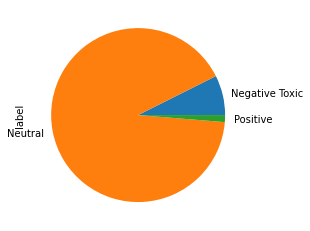

In [79]:
df.groupby('label').label.count().plot(kind='pie')

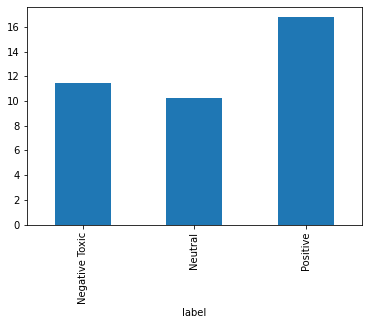

In [80]:
df.groupby('label').total_word.mean().plot(kind='bar')

#### Histogram

Berikut contoh visualisasi Histogram untuk melihat persebaran jumlah word (total_word).



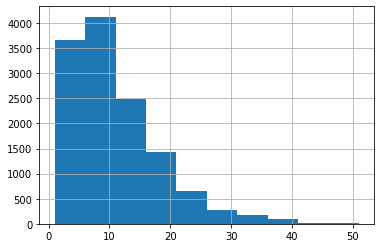

In [81]:
df.total_word.hist()

##### Histogram & Filter Sentiment

Kita bisa memfilter data berdasarkan sentimen setelah itu memvisualisasikannya dalam bentuk Histogram.

Hasilnya:

*   Pada sentimen Negative Toxic, mayoritas panjang katanya sekitar 0-10 kata. 
*   Pada sentimen Positive, mayoritas panjang katanya sekitar kurang dari 10 kata.
* Pada sentimen Neutral, mayoritas panjang katanya sekitar 5-15 kata.


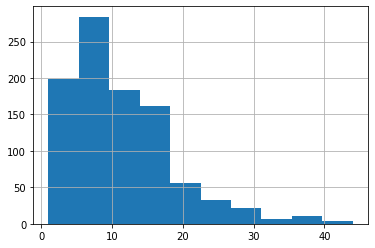

In [82]:
# misal visualisasi hanya berdasarkan sentimen negatif toxic
df_negative = df.loc[df['label'] == 'Negative Toxic']
df_negative['total_word'].hist()

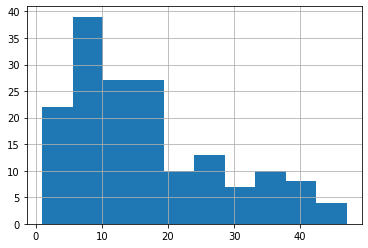

In [83]:
# misal visualisasi hanya berdasarkan sentimen Positive 
df_negative = df.loc[df['label'] == 'Positive']
df_negative['total_word'].hist()

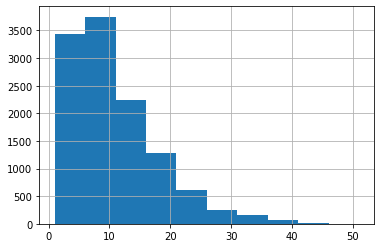

In [84]:
# misal visualisasi hanya berdasarkan sentimen Neutral 
df_negative = df.loc[df['label'] == 'Neutral']
df_negative['total_word'].hist()

#### Wordcloud

Kita bisa melihat kata yang sering muncul dengan visualisasi wordcloud. Terlihat pada visualisasi di bawah kata yang sering muncul adalah "dan", "dengan", "karena", "di", "sini", "tempat", "nya".

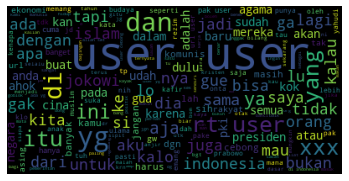

In [85]:
# Visualisasi Wordcloud

from wordcloud import WordCloud
text = ' '.join(df['cleaned_tweet'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### Wordcloud & Filter Sentiment

Kita bisa memfilter data berdasarkan sentimen setelah itu memvisualisasikannya dalam bentuk Worcloud.

Hasilnya:

*   Pada sentimen negatif, kata yang sering muncul adalah "nya", "yang", dan "dan". 
*   Pada sentimen netral, kata yang sering muncul adalah "dan", "yang", "di", "untuk", dan "dengan".
*   Pada sentimen positif, kata yang sering muncul adalah "dan", "di", "sini", "tempat", "nya", dan "enak".

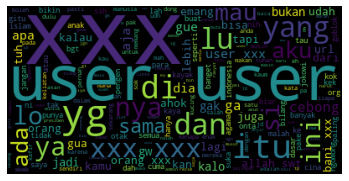

In [91]:
# Visualisasi Wordcloud sentiment negative toxic
# wordclod based on negative toxic sentimen
df_negative_toxic = df.loc[df['label'] == 'Negative Toxic']

text = ' '.join(df_negative_toxic['cleaned_tweet'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


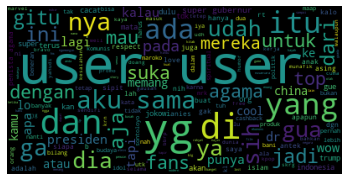

In [94]:
# Visualisasi Wordcloud sentiment Positive
# wordclod based on Positive sentimen
df_positive = df.loc[df['label'] == 'Positive']

text = ' '.join(df_positive['cleaned_tweet'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


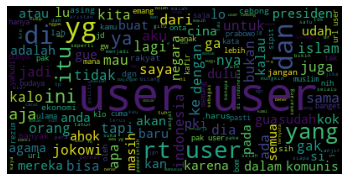

In [93]:
# Visualisasi Wordcloud sentiment Neutral
# wordclod based on Neutral sentimen
df_neutral = df.loc[df['label'] == 'Neutral']

text = ' '.join(df_neutral['cleaned_tweet'])
wordcloud = WordCloud().generate(text)

# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# Tambahan Analisis

Identifying the topics related to the tweets: Use topic modeling techniques on cleaned_tweet column to identify the most common topics that are related to the tweets.

In [89]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Tokenize the text
texts = df['cleaned_tweet'].tolist()
texts = [word_tokenize(text) for text in texts]

# Create the dictionary and corpus
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
num_topics = 10
ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=15)

# Print the top words for each topic
for topic in ldamodel.show_topics(num_topics=num_topics, num_words=10):
    print(topic)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(0, '0.021*"&" + 0.019*"amp" + 0.012*"dan" + 0.012*"pilkada" + 0.008*"di" + 0.008*"ku" + 0.008*"kota" + 0.007*")" + 0.007*"gubernur" + 0.006*"("')
(1, '0.111*"!" + 0.048*"#" + 0.014*"dan" + 0.012*"xxx" + 0.011*"ini" + 0.008*"&" + 0.008*"jokowi" + 0.008*"pki" + 0.007*"gt" + 0.006*"url"')
(2, '0.474*"user" + 0.031*"rt" + 0.014*"xxx" + 0.012*"cebong" + 0.007*"yg" + 0.007*"ya" + 0.005*"lu" + 0.005*"onta" + 0.004*"bani" + 0.004*"itu"')
(3, '0.122*"?" + 0.018*"ahok" + 0.018*"apa" + 0.012*"yg" + 0.011*"ya" + 0.010*"url" + 0.009*"si" + 0.009*"itu" + 0.009*"agama" + 0.008*"xxx"')
(4, '0.023*"dan" + 0.020*"di" + 0.018*"indonesia" + 0.016*"presiden" + 0.014*"yang" + 0.014*"jokowi" + 0.014*"(" + 0.013*")" + 0.010*"yg" + 0.009*"dari"')
(5, '0.056*"user" + 0.020*"yg" + 0.017*"itu" + 0.011*"ada" + 0.009*"xxx" + 0.009*"kristen" + 0.008*"yang" + 0.007*"orang" + 0.007*"di" + 0.007*"nusantara"')
(6, '0.025*"di" + 0.013*"anti" + 0.012*"ini" + 0.012*"dan" + 0.008*"(" + 0.008*"hoax" + 0.007*")" + 0.007*"yg"